In [1]:
# B train
# average AM enters / exits

In [2]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [4]:
# look at B line only
B_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('B')]

In [5]:
# look at all station names
B_train_all['STATION'].unique()

array(['103 ST', '116 ST', '125 ST', '135 ST', '145 ST', '155 ST',
       '161/YANKEE STAD', '170 ST', '182-183 STS', '34 ST-HERALD SQ',
       '42 ST-BRYANT PK', '47-50 STS ROCK', '5 AVE', '59 ST COLUMBUS',
       '7 AV', '72 ST', '81 ST-MUSEUM', '86 ST', '96 ST',
       'ATL AV-BARCLAY', 'AVENUE H', 'AVENUE J', 'AVENUE M', 'AVENUE U',
       "B'WAY-LAFAYETTE", 'BEDFORD PK BLVD', 'BEVERLEY ROAD',
       'BRIGHTON BEACH', 'CATHEDRAL PKWY', 'CHURCH AV', 'CORTELYOU RD',
       'DEKALB AV', 'FORDHAM RD', 'GRAND ST', 'KINGS HWY',
       'KINGSBRIDGE RD', 'NECK RD', 'NEWKIRK PLAZA', 'PARKSIDE AV',
       'PROSPECT PARK', 'SHEEPSHEAD BAY', 'TREMONT AV', 'W 4 ST-WASH SQ'],
      dtype=object)

In [6]:
# check station count
B_train_all['STATION'].count()

47

In [7]:
# need to differentiate the two 7 AV before merging
B_train_all.loc[(B_train_all.STATION == '7 AV') & (B_train_all.LINENAME == "BDE"),
                'STATION'] = "7 AV 53 ST"
B_train_all.head()

/Users/djferrera/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,STATION,LINENAME,AM_ENTERS,AM_EXITS
3,103 ST,BC,4581.0,1183.0
13,116 ST,BC,5165.0,2321.0
19,125 ST,ACBD,8707.0,6616.0
21,135 ST,BC,3747.0,3475.0
30,145 ST,ABCD,13017.0,5495.0


In [9]:
# needs further cleaning
B_train_all["STATION"].replace("5 AVE", value="42 ST-BRYANT PK", inplace=True)

In [10]:
# now sum same name rows
B_commuters = B_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
B_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
103 ST,4581.0,1183.0
116 ST,5165.0,2321.0
125 ST,8707.0,6616.0
135 ST,3747.0,3475.0
145 ST,13017.0,5495.0


In [11]:
# order stations in excel
# save as csv
B_commuters.to_csv('B_commuters.csv')

In [12]:
# open ordered CSV
csv_path_B = 'B_commuters_order.csv'
B_commuters_order = pd.read_csv(csv_path_B, encoding="utf-8")
B_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,BEDFORD PK BLVD,10584,1327
1,KINGSBRIDGE RD,13118,1982
2,FORDHAM RD,8185,915
3,182-183 STS,4110,263
4,TREMONT AV,18427,3098


In [14]:
B_commuters_order['AM_AVG_ENTER'] = B_commuters_order['AM_ENTERS']/5

In [15]:
B_commuters_order['AM_AVG_EXIT'] = B_commuters_order['AM_EXITS']/5
B_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,BEDFORD PK BLVD,10584,1327,2116.8,265.4
1,KINGSBRIDGE RD,13118,1982,2623.6,396.4
2,FORDHAM RD,8185,915,1637.0,183.0
3,182-183 STS,4110,263,822.0,52.6
4,TREMONT AV,18427,3098,3685.4,619.6


In [16]:
# order stations in excel
# save as csv
B_commuters_order.to_csv('B_commuters_final.csv')

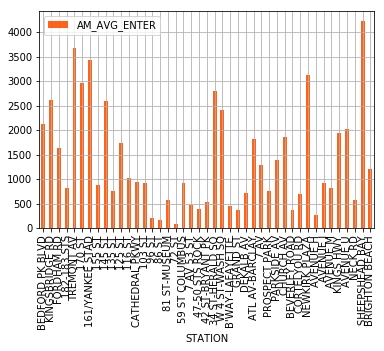

In [17]:
# graph B Train AM AVG ENTERS
plt = B_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#FF6319')
plt.grid()

# save the fig
plt.figure.savefig('B-AM-enter.pdf')

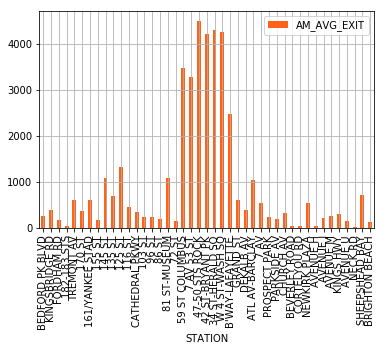

In [18]:
# graph B Train AM AVG EXITS
plt = B_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#FF6319')
plt.grid()

# save the fig
plt.figure.savefig('B-AM-exit.pdf')